# Einwanderer Abschluss

Welchen Abschluss bzw. welche Bildung haben die Bewerber?

Die benötigten Informationen befinden sich in der Spalte foreign_worker_info_education

In [81]:
import cleanup
import pandas as pd
import matplotlib.pyplot as plt
import modules
plt.style.use('../own_style.mplstyle')

In [82]:
# cleanup.generate_cleaned_df()


In [83]:
col_list = ["foreign_worker_info_education", "country_of_citizenship"]
visas_df = pd.read_csv('../data/us_perm_visas_cleaned.csv', usecols=col_list)

C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [84]:
visas_df['foreign_worker_info_education'].value_counts()


Master's       103662
Bachelor's      87686
None            18344
Doctorate       12243
Other           10245
High School      4536
Associate's      2337
Name: foreign_worker_info_education, dtype: int64

In [85]:
visas_df["foreign_worker_info_education"].isna().sum()

135309

Im Datensatz sind 135.309 Einträge ohne hinterlegten Bildungsabschluss vorhanden.
Diese Datensätze sind hier irrelevant, da sie keinen Erkentnissgewinn bieten können und werden somit verworfen.


In [86]:
visas_df.dropna(subset = ["foreign_worker_info_education"], inplace=True)

Die Eregbnisse werden grafisch dargestellt:

<AxesSubplot:title={'center':'Number of Visa Applications by Educational Qualification'}, xlabel='Educational Qualification', ylabel='Number of Visa Applications'>

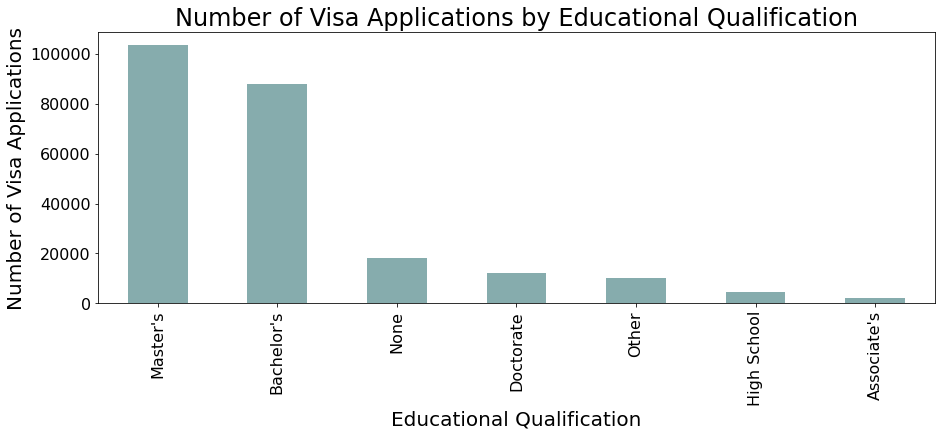

In [87]:
visas_df['foreign_worker_info_education'].value_counts().plot(kind="bar", xlabel="Educational Qualification", ylabel = "Number of Visa Applications", title = "Number of Visa Applications by Educational Qualification", figsize = [15,5])


Es soll ein weiteres Balkendiagramm mit kategorischer Sortierung erstellt werden.
Die Sortierung wurde gemäß folgender Webseite gewählt: https://www.indeed.com/career-advice/career-development/types-of-academic-degrees

Der Bildungsabschluss "Other" lässt sich nicht nach Bildungsabschluss-Wertigkeit sortieren.
Aus diesem Grund wird dieser, auch für alle nachfolgenden Analysen, aus dem Datensatz herausgefiltert.
Dies betrifft 20.490 Zeilen.

In [88]:
visas_df[visas_df["foreign_worker_info_education"]=="Other"].size

20490

In [89]:
visas_df = visas_df[visas_df["foreign_worker_info_education"]!="Other"]

In [90]:
categories = ["None", "High School", "Associate's", "Bachelor's", "Master's", "Doctorate"]

In [91]:
edu_categorical_df = visas_df['foreign_worker_info_education'].value_counts().to_frame()

In [92]:
edu_categorical_df = edu_categorical_df.reindex(categories)

<AxesSubplot:>

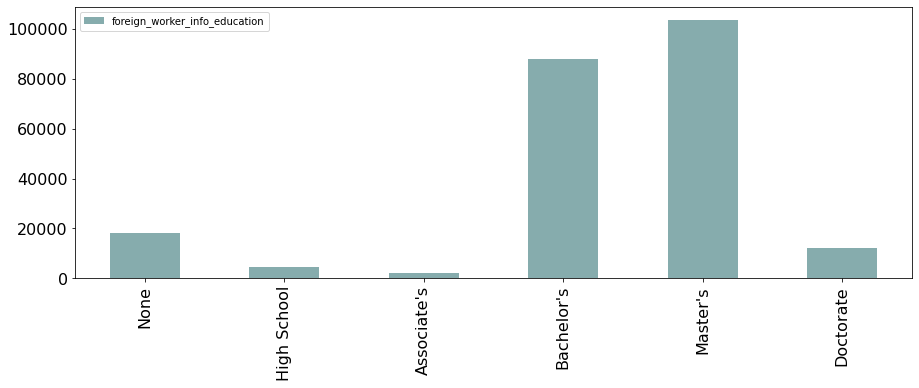

In [93]:
edu_categorical_df.plot(kind="bar", figsize = [15,5])

Es ist unschwer zu erkennen, dass die überwiegende Anzahl der Bewerber über einen gehobenen Bildungsabschluss verfügen.

Zudem wollen wir uns genauer ansehen, wie die verschiedenen Bildungsabschlüsse, bei den jeweiligen Herkunftsländer der Bewerber verteten sind.
Es wir hierbei nur auf die 20 Herkunftsländer mit den meisten Bewerbern gelegt.

Es muss beachtet werden, dass nur die Anzahl der Bewerber gezählt wurden, bei denen auch Bildungsabschlussdaten vorlagen.

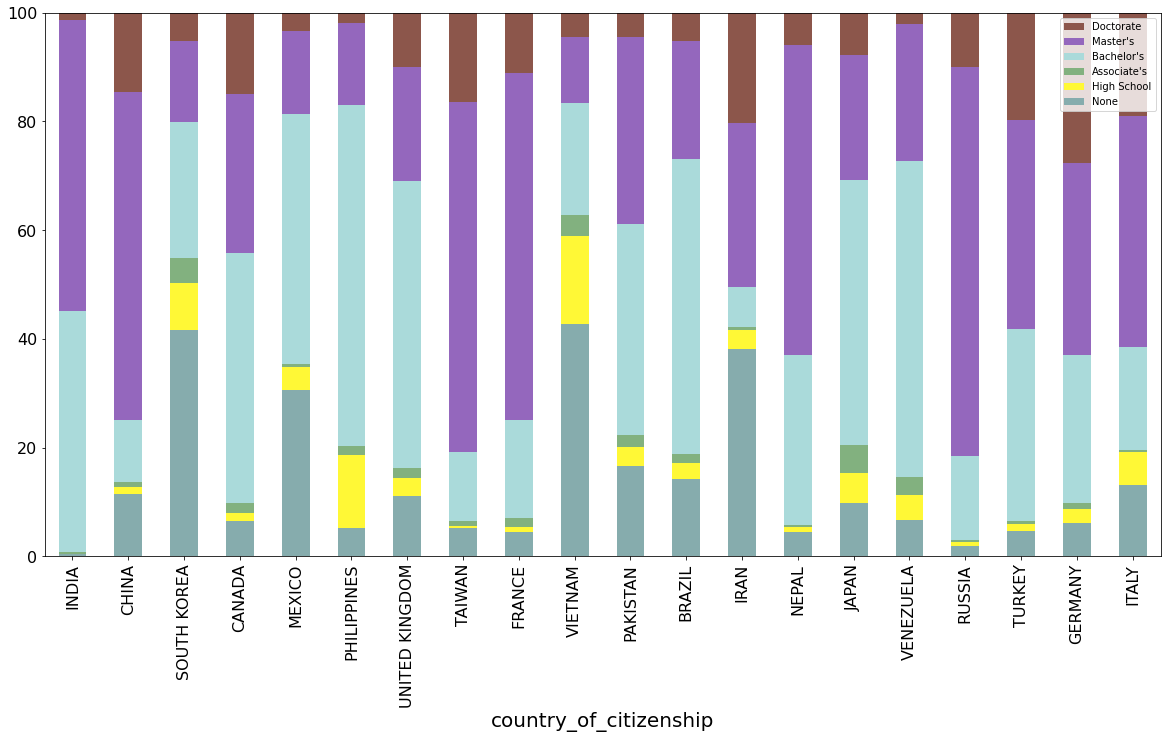

In [94]:
modules.invokes_influenced_is_influenced_by_stacked_bar_chart(dataFrameToAnalyze=visas_df,
                                                invokesInfluence="country_of_citizenship",
                                                isInfluencedBy="foreign_worker_info_education",
                                                CountOfTopValuesInvokesInfluence=20,
                                                CountOfTopValuesIsInfluencedBy=20,
                                                orderedLegend=categories)


Es lässt sich festhalten, dass aus Süd Korea, Mexico, Vietnam und Iran verhältnismäßig viele Bewerber ohne Bildungsabschluss vorliegen.
Bewerber aus Taiwan, Russland, China und Frankreich haben hingegen verhältnismäßig oft einen Masterabschluss oder höher.
